In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/Users/tzeng/repos/math_comps


In [56]:
import pickle
from tqdm import tqdm
from brute_stratum import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 15})



In [ ]:
# genuses = ([],[],[]) # 0 rand, 1 fixed, 2 fixed_conj
# for n in tqdm(range(1,251)):
#     genuses[0].append(get_stratums_sample(n, model='rand', genus=True, d=False))
#     genuses[1].append(get_stratums_sample(n, model='fixed', genus=True, d=False))
#     genuses[2].append(get_stratums_sample(n, model='fixed_conj', genus=True, d=False))

In [7]:
# pickle.dump(genuses, open('genuses.sav', 'wb'))
genuses = pickle.load(open('genuses.sav', 'rb'))

In [8]:
gs = np.array(genuses)
gs_mean = gs.mean(axis=2)

In [9]:
gs_mean[:,:10]

array([[1.    , 1.    , 1.5061, 1.7873, 2.2745, 2.6661, 3.1387, 3.571 ,
        4.0362, 4.4824],
       [1.    , 1.    , 1.5033, 1.8362, 2.2936, 2.6914, 3.1499, 3.5867,
        4.0466, 4.4904],
       [1.    , 1.    , 1.4979, 1.8297, 2.2925, 2.6953, 3.1558, 3.5832,
        4.037 , 4.4857]])

In [107]:
gs_mean[:, 249]

array([122.9673, 122.9545, 122.9526])

(1.0, 125.0)

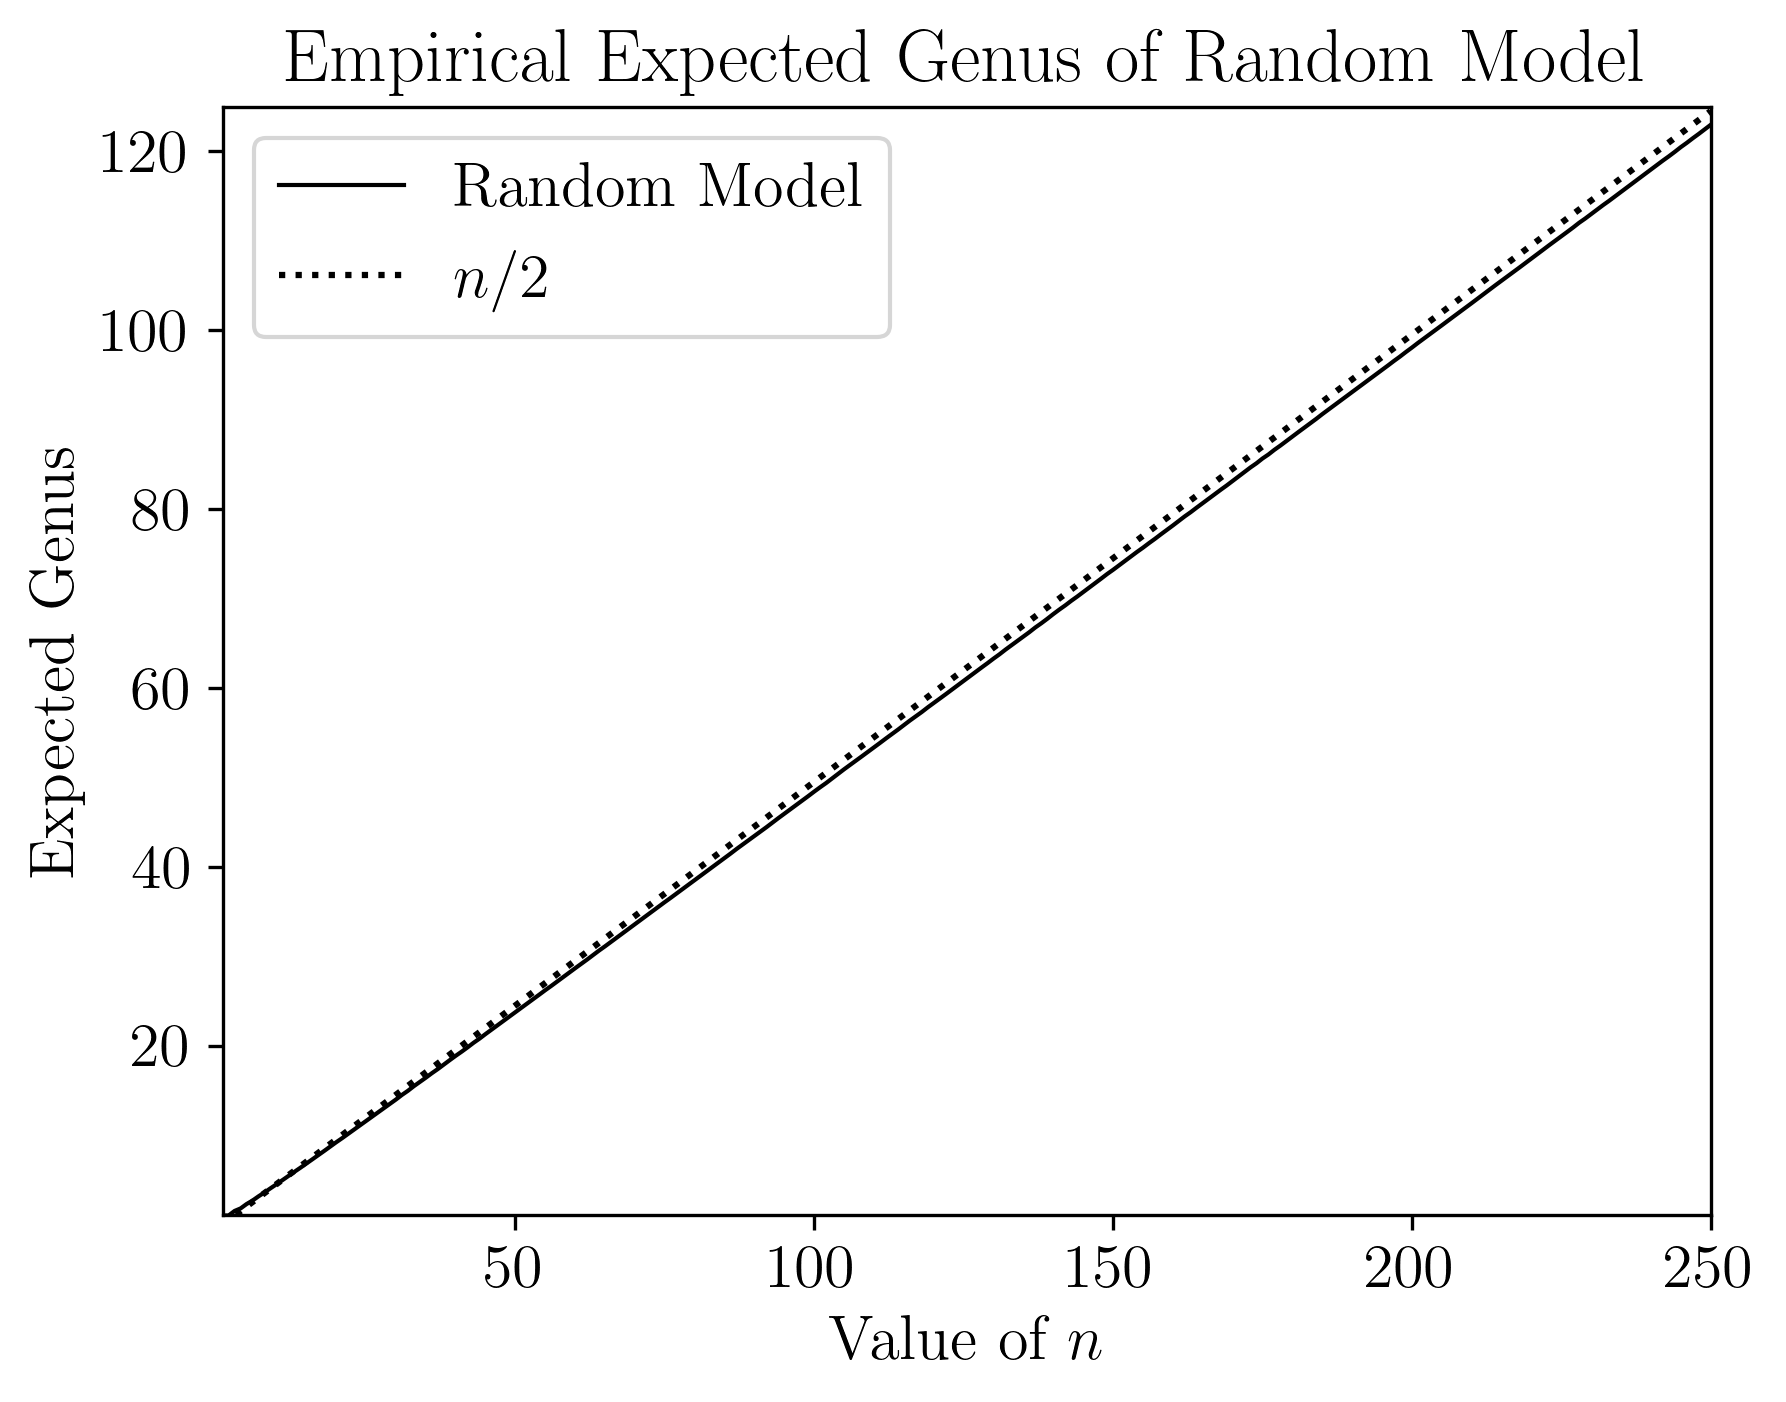

In [54]:
x = [n for n in range(1, 251)]
y = [(n-1)/2 for n in range(1, 251)]
plt.plot(x, gs_mean[0], 'k-', linewidth=1, label='Random Model')
# plt.scatter(x, gs_mean[1], s=.1)
plt.plot(x,y, 'k:', label='$n/2$')
plt.legend(loc='best')
plt.xlabel('Value of $n$')
plt.ylabel('Expected Genus')
plt.title('Empirical Expected Genus of Random Model')
plt.xlim(1,250)
plt.ylim(1,125)

([<matplotlib.axis.XTick object at 0x335ac1e50>,
 [Text(118, 0, '$\\mathdefault{118}$'),
  Text(119, 0, '$\\mathdefault{119}$'),
  Text(120, 0, '$\\mathdefault{120}$'),
  Text(121, 0, '$\\mathdefault{121}$'),
  Text(122, 0, '$\\mathdefault{122}$'),
  Text(123, 0, '$\\mathdefault{123}$'),
  Text(124, 0, '$\\mathdefault{124}$'),
  Text(125, 0, '$\\mathdefault{125}$')])

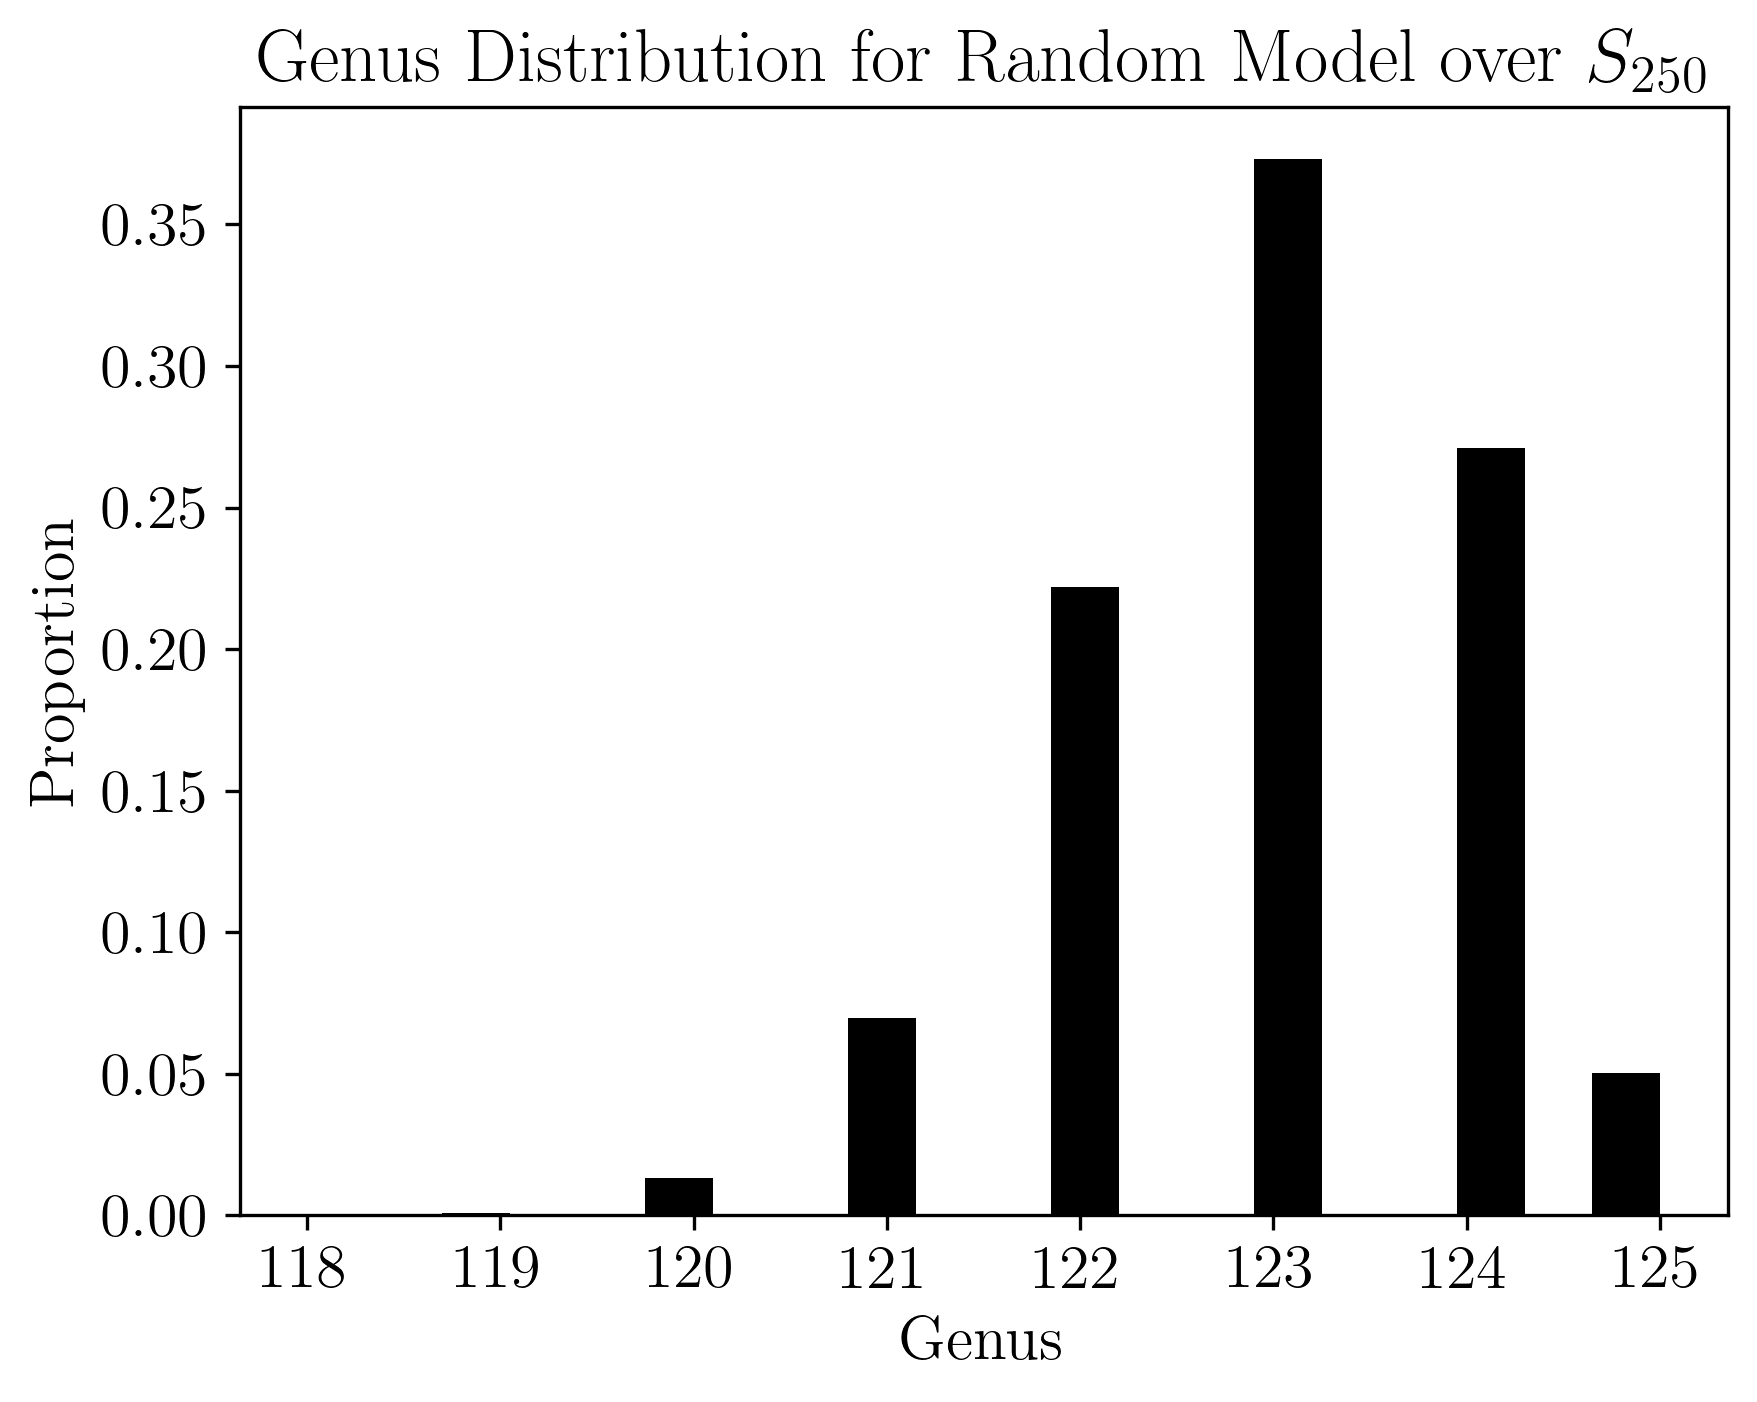

In [55]:
plt.hist(gs[0][249], bins=20, weights=np.ones(10000) / 10000, color='black')
plt.xlabel('Genus')
plt.ylabel('Proportion')
plt.title('Genus Distribution for Random Model over $S_{250}$')
xstart, xend = plt.xlim()
plt.xticks(np.arange(math.ceil(xstart), math.ceil(xend), 1))

([<matplotlib.axis.XTick object at 0x34607f5d0>,
 [Text(118, 0, '$\\mathdefault{118}$'),
  Text(119, 0, '$\\mathdefault{119}$'),
  Text(120, 0, '$\\mathdefault{120}$'),
  Text(121, 0, '$\\mathdefault{121}$'),
  Text(122, 0, '$\\mathdefault{122}$'),
  Text(123, 0, '$\\mathdefault{123}$'),
  Text(124, 0, '$\\mathdefault{124}$'),
  Text(125, 0, '$\\mathdefault{125}$')])

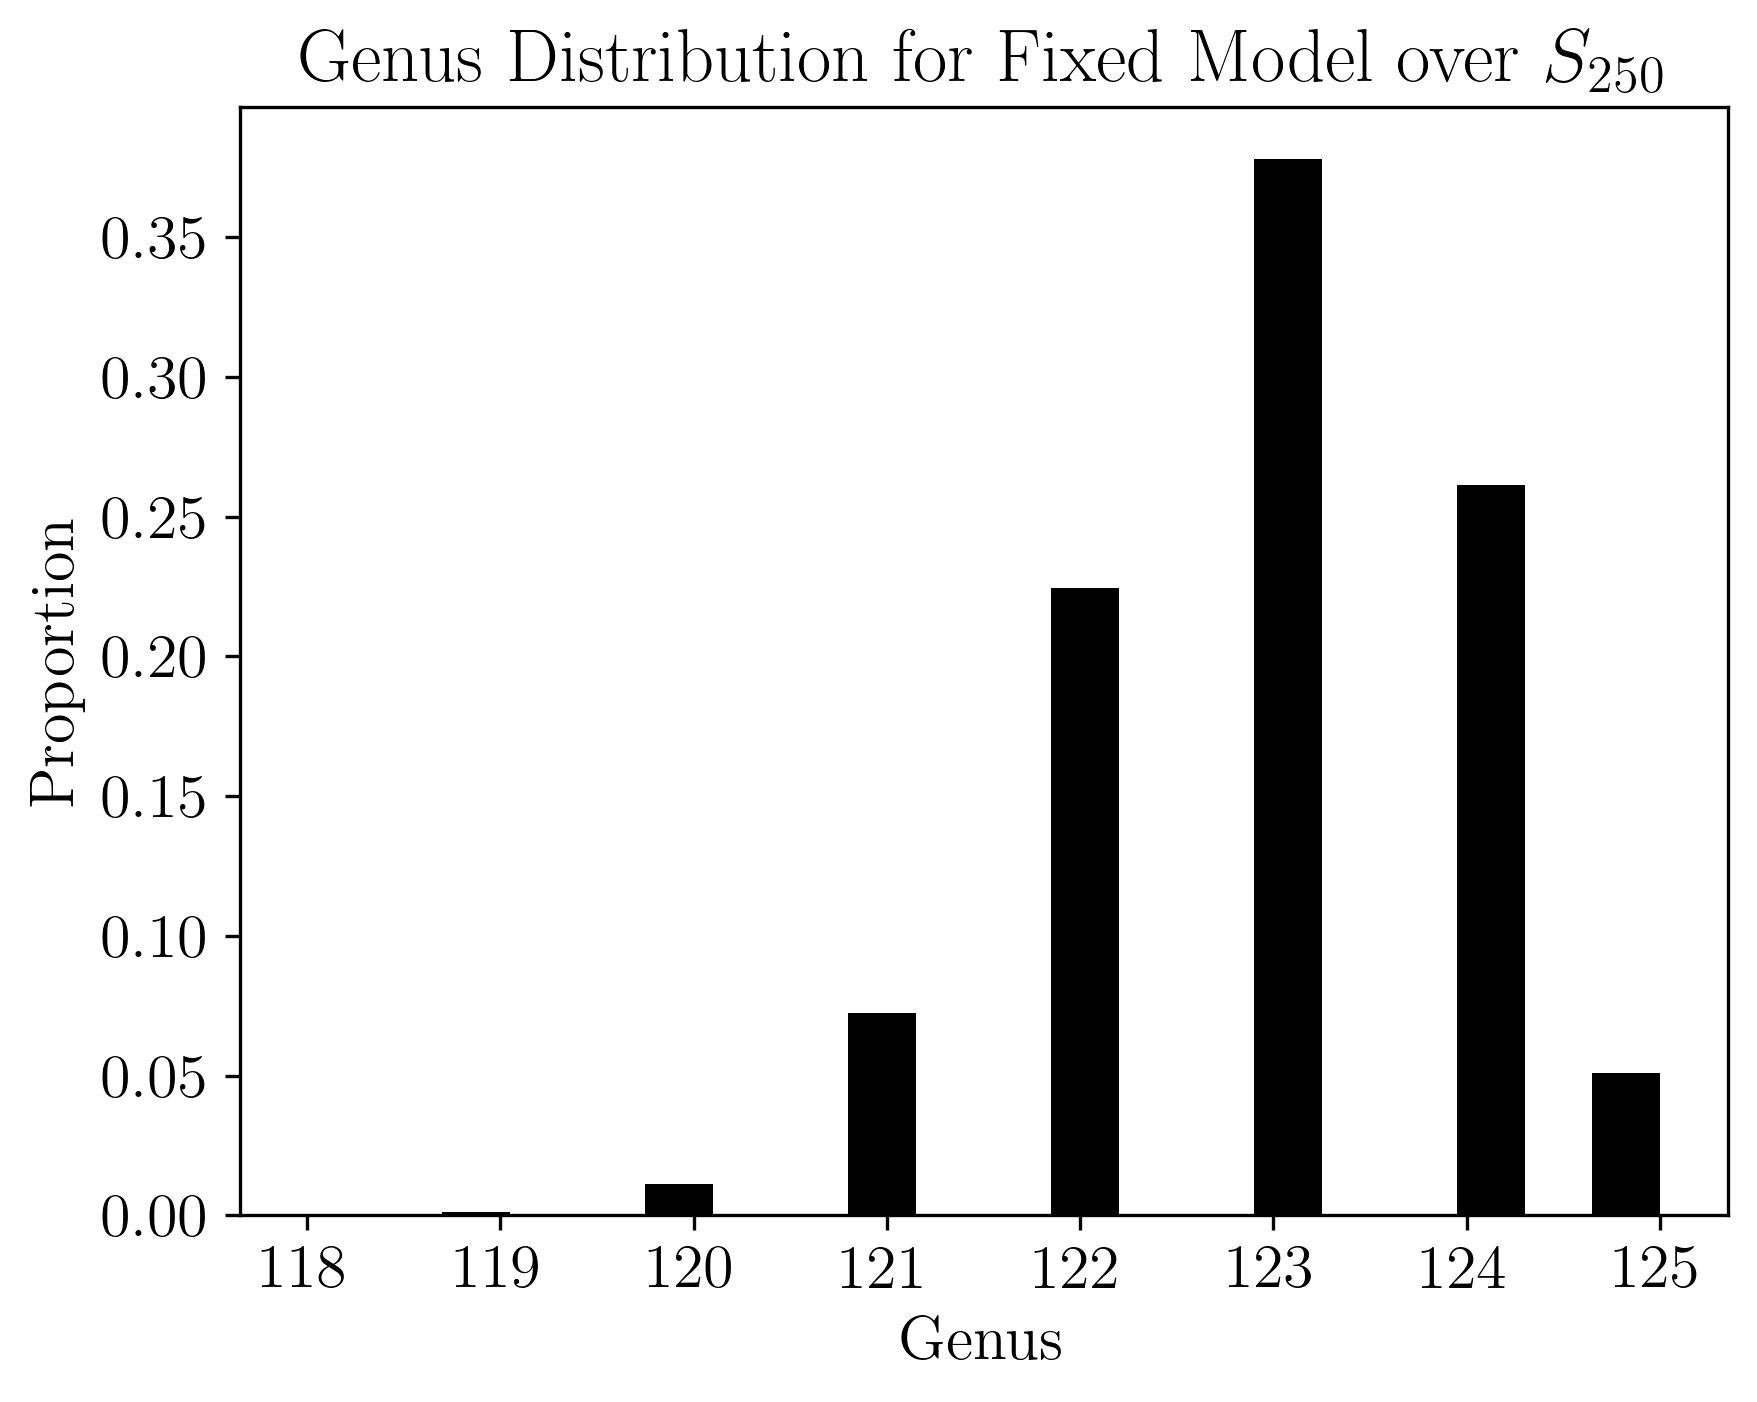

In [57]:
plt.hist(gs[1][249], bins=20, weights=np.ones(10000) / 10000, color='black')
plt.xlabel('Genus')
plt.ylabel('Proportion')
plt.title('Genus Distribution for Fixed Model over $S_{250}$')
xstart, xend = plt.xlim()
plt.xticks(np.arange(math.ceil(xstart), math.ceil(xend), 1))

([<matplotlib.axis.XTick object at 0x2fb0695d0>,
 [Text(118, 0, '$\\mathdefault{118}$'),
  Text(119, 0, '$\\mathdefault{119}$'),
  Text(120, 0, '$\\mathdefault{120}$'),
  Text(121, 0, '$\\mathdefault{121}$'),
  Text(122, 0, '$\\mathdefault{122}$'),
  Text(123, 0, '$\\mathdefault{123}$'),
  Text(124, 0, '$\\mathdefault{124}$'),
  Text(125, 0, '$\\mathdefault{125}$')])

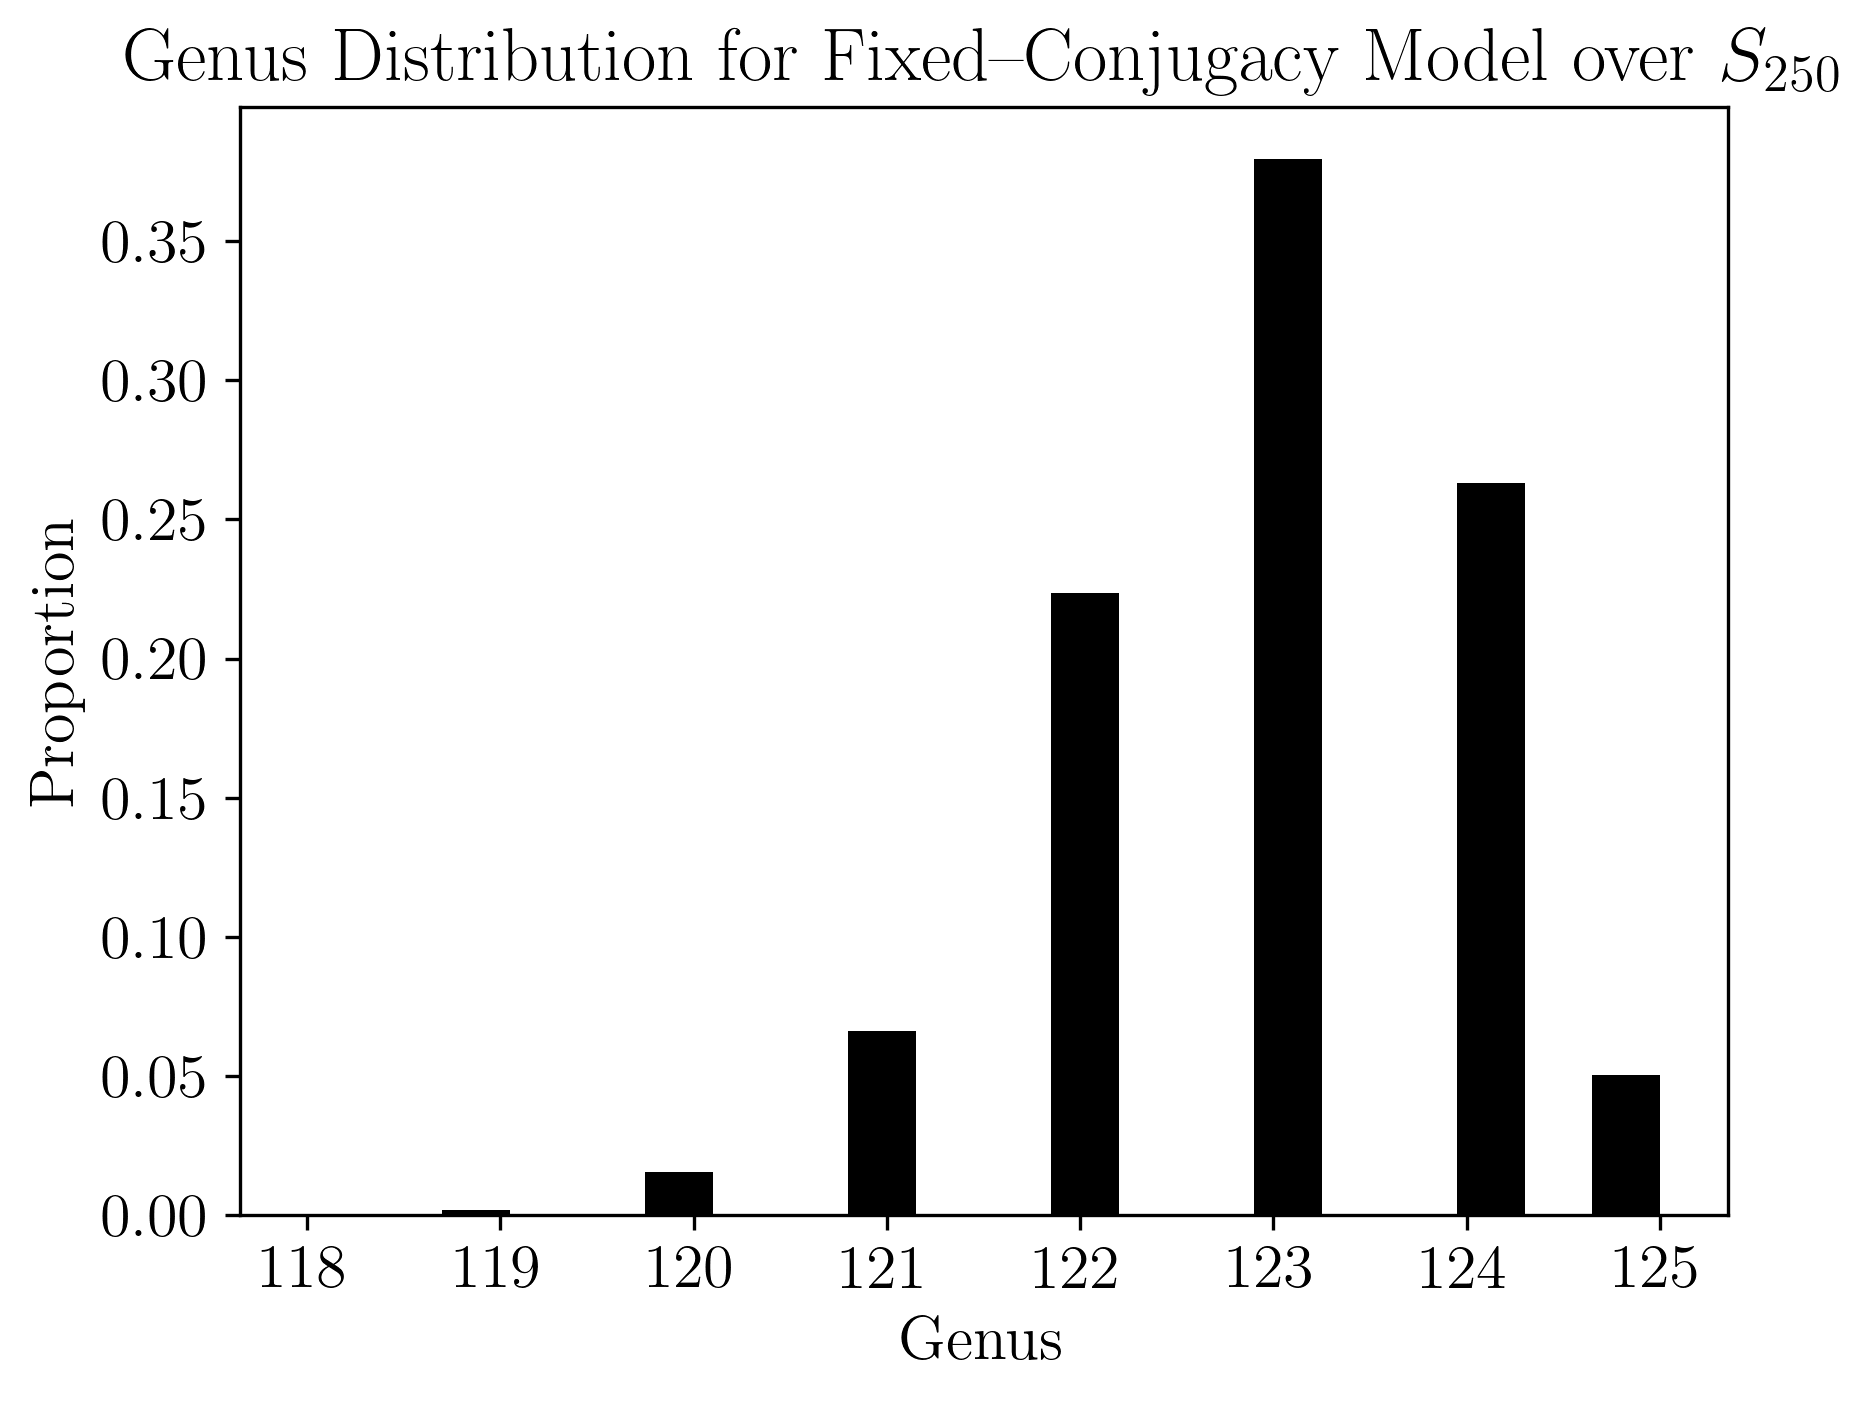

In [145]:
plt.hist(gs[2][249], bins=20, weights=np.ones(10000) / 10000, color='black')
plt.xlabel('Genus')
plt.ylabel('Proportion')
plt.title('Genus Distribution for Fixed--Conjugacy Model over $S_{250}$')
xstart, xend = plt.xlim()
plt.xticks(np.arange(math.ceil(xstart), math.ceil(xend), 1))

# Stratum stuff?

In [16]:
stratas = ([],[],[]) # 0 rand, 1 fixed, 2 fixed_conj
for n in tqdm(range(1,251)):
    stratas[0].append(get_stratums_sample(n, model='rand', genus=False))
    stratas[1].append(get_stratums_sample(n, model='fixed', genus=False))
    stratas[2].append(get_stratums_sample(n, model='fixed_conj', genus=False))

100%|██████████| 250/250 [08:05<00:00,  1.94s/it]


In [28]:
# pickle.dump(stratas, open('stratas.sav', 'wb'))

In [15]:
stratas[1]

[{((0, 1),): 10000},
 {((0, 2),): 10000},
 {((2, 1),): 5066, ((0, 3),): 4934},
 {((0, 1), (2, 1)): 6643, ((0, 4),): 1726, ((1, 2),): 1631}]

In [23]:
stratas[0][2]

{((0, 3),): 5022, ((2, 1),): 4978}

In [32]:
most_common = []
for s in stratas[0]:
    ls = list(s.items())
    ls.sort(reverse=True, key=lambda x:x[1])
    most_common.append(ls[0][0])

In [52]:
most_common

[((0, 1),),
 ((0, 2),),
 ((0, 3),),
 ((0, 1), (2, 1)),
 ((0, 2), (2, 1)),
 ((0, 1), (4, 1)),
 ((6, 1),),
 ((0, 1), (6, 1)),
 ((8, 1),),
 ((0, 1), (8, 1)),
 ((10, 1),),
 ((0, 1), (10, 1)),
 ((12, 1),),
 ((0, 1), (12, 1)),
 ((14, 1),),
 ((0, 1), (14, 1)),
 ((16, 1),),
 ((0, 1), (16, 1)),
 ((18, 1),),
 ((0, 1), (18, 1)),
 ((20, 1),),
 ((0, 1), (20, 1)),
 ((22, 1),),
 ((0, 1), (22, 1)),
 ((24, 1),),
 ((0, 1), (24, 1)),
 ((26, 1),),
 ((0, 1), (26, 1)),
 ((28, 1),),
 ((0, 1), (28, 1)),
 ((30, 1),),
 ((0, 1), (30, 1)),
 ((32, 1),),
 ((0, 1), (32, 1)),
 ((34, 1),),
 ((0, 1), (34, 1)),
 ((36, 1),),
 ((0, 1), (36, 1)),
 ((38, 1),),
 ((0, 1), (38, 1)),
 ((40, 1),),
 ((0, 1), (40, 1)),
 ((42, 1),),
 ((0, 1), (42, 1)),
 ((44, 1),),
 ((0, 1), (44, 1)),
 ((46, 1),),
 ((0, 1), (46, 1)),
 ((48, 1),),
 ((0, 1), (48, 1)),
 ((50, 1),),
 ((0, 1), (50, 1)),
 ((52, 1),),
 ((0, 1), (52, 1)),
 ((54, 1),),
 ((0, 1), (54, 1)),
 ((56, 1),),
 ((0, 1), (56, 1)),
 ((58, 1),),
 ((0, 1), (58, 1)),
 ((60, 1),),
 ((0, 1

In [33]:
prob_probs = ([],[],[])
for i in range(3):
    for s in stratas[i]:
        ls = list(s.items())
        ls.sort(reverse=True, key=lambda x:x[1])
        prob_probs[i].append(ls[0][1]/10000)

Text(0.5, 1.0, 'Empirical Proportion of Most Probable Strata')

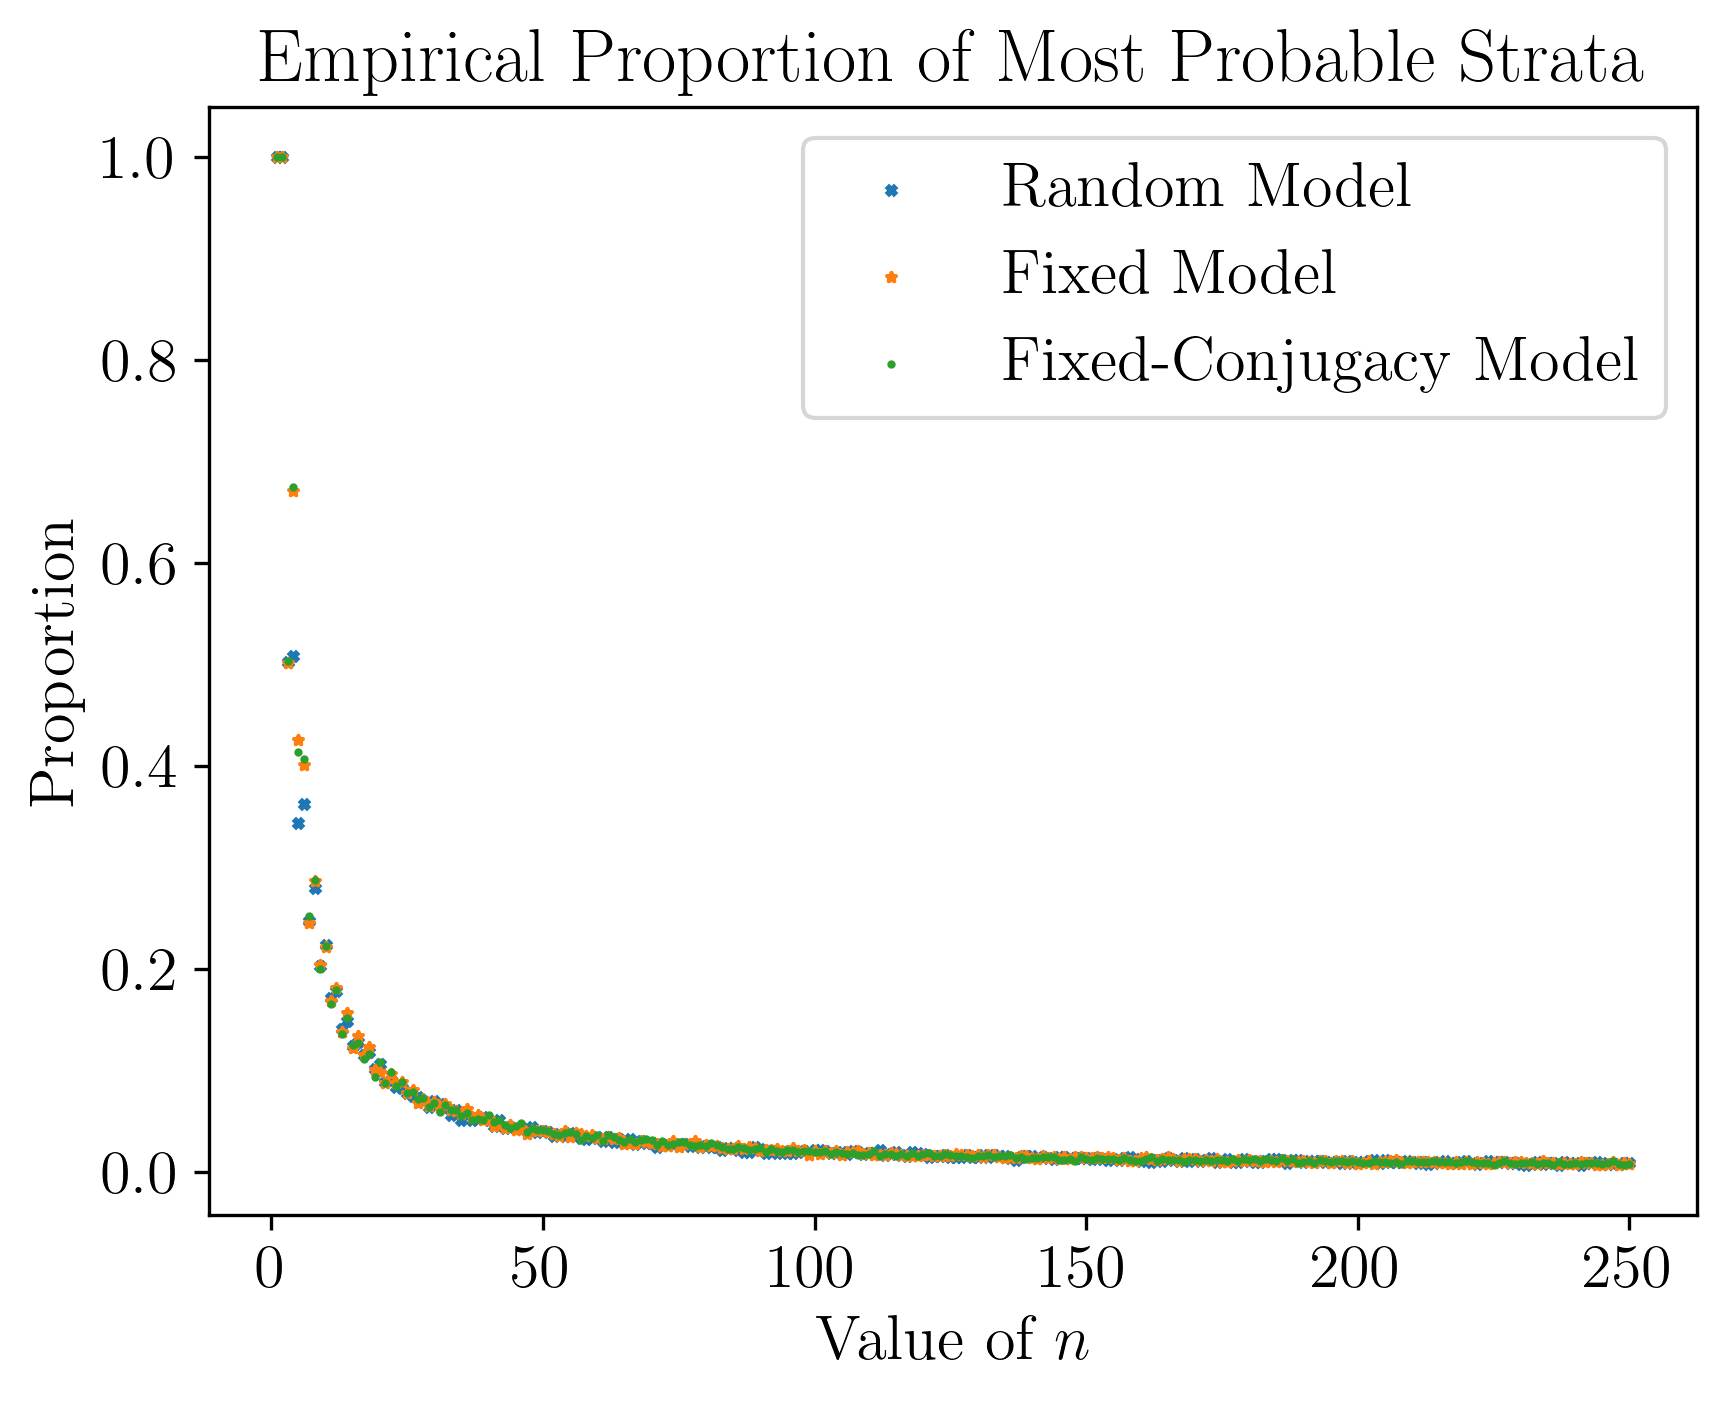

In [58]:
x = [n for n in range(1, 251)]

y = [2/(n-1) if n %2==0 else 2/n for n in range(1, 251)]


plt.scatter(x, prob_probs[0], s=5, marker='x', label='Random Model')
plt.scatter(x, prob_probs[1], s=5, marker='*', label='Fixed Model')
plt.scatter(x, prob_probs[2], s=1, label='Fixed-Conjugacy Model')
plt.legend(loc='best')
plt.xlabel('Value of $n$')
plt.ylabel('Proportion')
plt.title('Empirical Proportion of Most Probable Strata')
